# **Reading .JPG images and corresponding GroundTruth images from Train Data**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Name: 
['100075.jpg', '100080.jpg', '100098.jpg', '103041.jpg', '104022.jpg', '105019.jpg', '105053.jpg', '106025.jpg', '106020.jpg', '108041.jpg', '108073.jpg', '109034.jpg', '112082.jpg', '113009.jpg', '113016.jpg', '113044.jpg', '117054.jpg', '118020.jpg', '118035.jpg', '12003.jpg', '12074.jpg', '122048.jpg', '124084.jpg', '126039.jpg', '130034.jpg', '134008.jpg', '134052.jpg', '135037.jpg', '135069.jpg', '138032.jpg', '138078.jpg', '140055.jpg', '140075.jpg', '144067.jpg', '145014.jpg', '145053.jpg', '147021.jpg', '147062.jpg', '15004.jpg', '15088.jpg', '151087.jpg', '153077.jpg', '153093.jpg', '155060.jpg', '156079.jpg', '157036.jpg', '159029.jpg', '159045.jpg', '159091.jpg', '16052.jpg', '161062.jpg', '163014.jpg', '163062.jpg', '164074.jpg', '166081.jpg', '169012.jpg', '170054.jpg', '172032.jpg', '173036.jpg', '176019.jpg', '176035.jpg', '176039.jpg', 

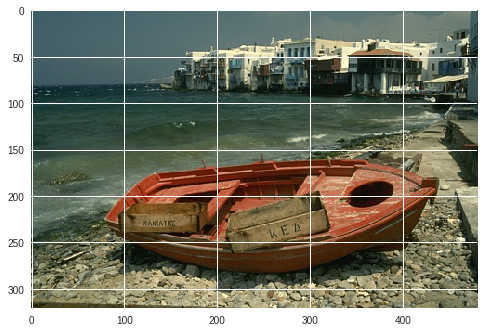

6


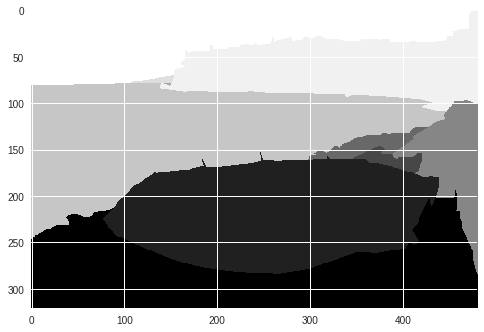

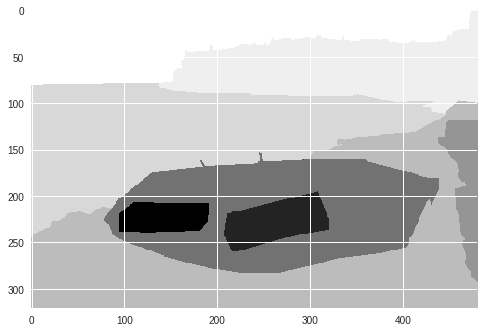

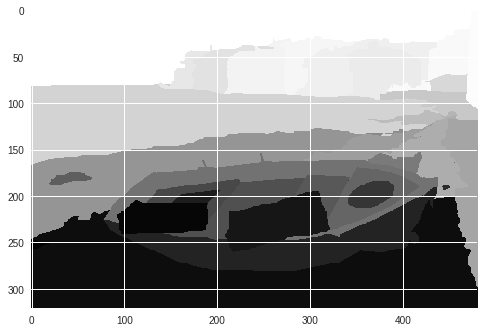

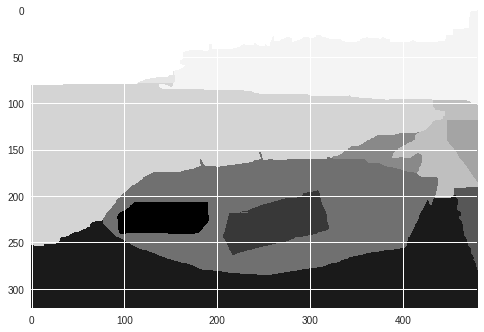

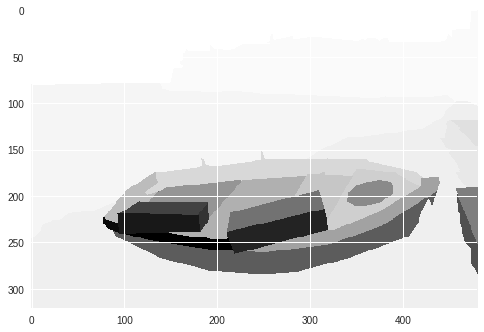

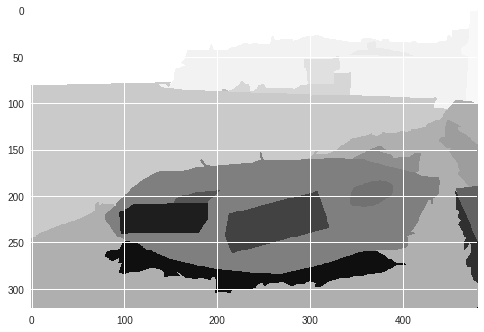

Visulaize of a Test image with its groundTruth Images


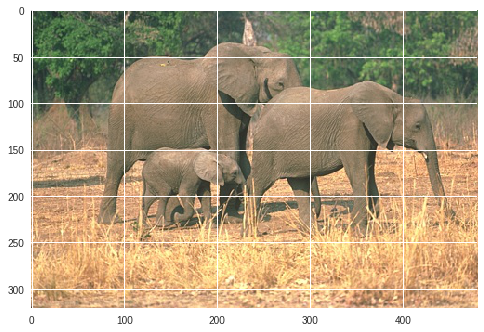

7


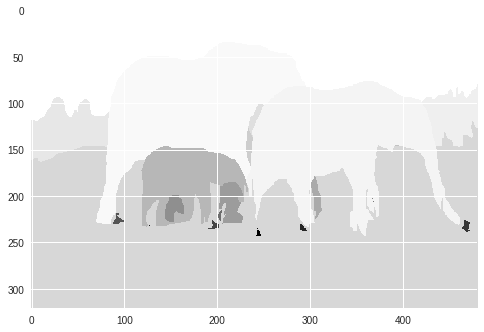

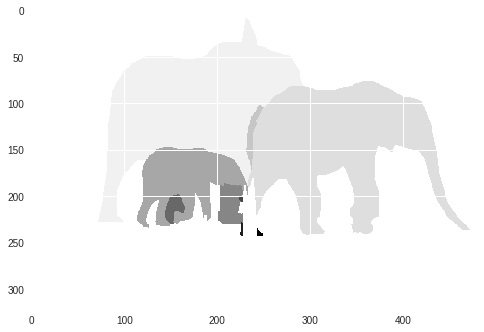

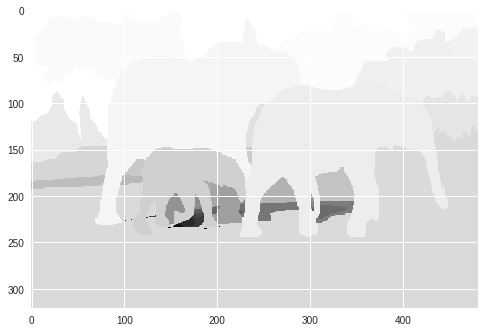

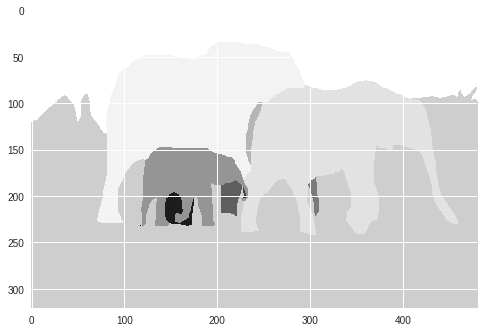

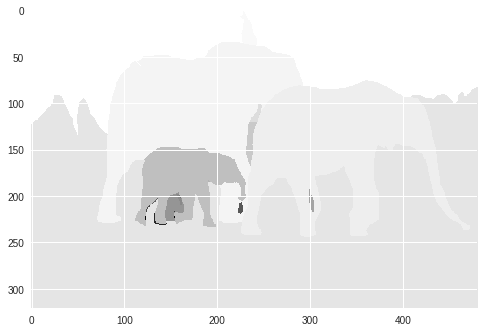

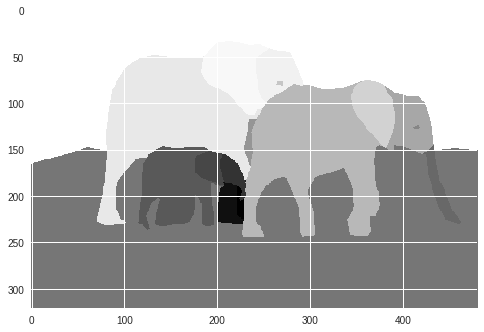

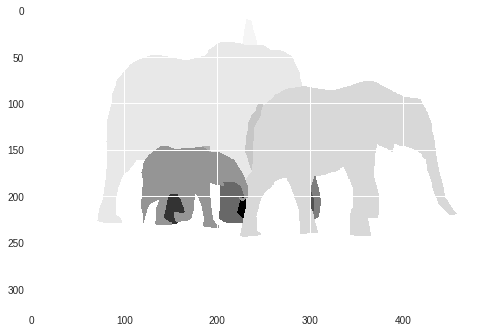

In [46]:
import matplotlib.pyplot as plt
from scipy import ndimage
from sklearn import cluster
import os
from google.colab import drive
import numpy as np
import scipy.io
import random
import sys
import copy
from PIL import Image
from sklearn import preprocessing
import math
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import SpectralClustering
from scipy.misc import imread
from os import listdir
from os.path import isfile, join


##### read all images and save them in dictionary
def read_train_imgs():
    drive.mount('/content/drive')
    
    train_jpg_src = '/content/drive/My Drive/Colab Notebooks/BSR_img/train'
    train_gt_src = '/content/drive/My Drive/Colab Notebooks/BSR_growntruth/train'
    
    
    train_gt_dic = [dict() for x in range(200)]
    
    
    #sort images in train to correctly read them    
    images_Train = [f for f in listdir(train_jpg_src) if isfile(join(train_jpg_src, f)) and f.endswith(".jpg") ]
    images_Train=sorted(images_Train)
    groundTruth_files = [f for f in listdir(train_gt_src) if isfile(join(train_gt_src, f)) and f.endswith(".mat")]
    groundTruth_files=sorted(groundTruth_files)
    
    
    
    train_jpg_dic = {}
    
    for i in range (0,len(images_Train)):
        #for test
        if(i == 5):
          print("Name: ")
          print(str(os.listdir(train_jpg_src)))
          
          
        
        #reading train .jpg of image i 
        image = Image.open(train_jpg_src + "/" + images_Train[i])
        train_jpg_dic[str(i)] = image
        i = i + 1
        
              
    #reading train ground truth images for every img
    
    for q in range (0,len(groundTruth_files)):

        #for test
        if(q == 5):
          print("Name: ")
          print(str(os.listdir(train_jpg_src)))

        my_dict_for_data_ground = {}

        data = scipy.io.loadmat(train_gt_src + "/" + groundTruth_files[q])
        for j in range(0, data['groundTruth'].size):
            img = np.array(data['groundTruth'][0][j]['Segmentation'][0][0])
            my_dict_for_data_ground[str(j)] = img
        train_gt_dic[q] = my_dict_for_data_ground
        q = q + 1
                   
        
    return train_jpg_dic,train_gt_dic

  
def read_test_imgs():
    drive.mount('/content/drive')
    
    test_jpg_src = '/content/drive/My Drive/Colab Notebooks/BSR_img/test'
    test_gt_src = '/content/drive/My Drive/Colab Notebooks/BSR_growntruth/test'
    
    
    test_gt_dic = [dict() for x in range(200)]
    
    
    #sort images in test to correctly read them    
    images_Test = [f for f in listdir(test_jpg_src) if isfile(join(test_jpg_src, f)) and f.endswith(".jpg") ]
    images_Test=sorted(images_Test)
    groundTruth_files = [f for f in listdir(test_gt_src) if isfile(join(test_gt_src, f)) and f.endswith(".mat")]
    groundTruth_files=sorted(groundTruth_files)
    
    
    
    test_jpg_dic = {}
    
    for i in range (0,len(images_Test)):
        #for test
        if(i == 5):
          print("Name: ")
          print(str(os.listdir(test_jpg_src)))
          
          
        
        #reading test .jpg of image i 
        image = Image.open(test_jpg_src + "/" + images_Test[i])
        test_jpg_dic[str(i)] = image
        i = i + 1
        
              
    #reading test ground truth images for every img
    
    for q in range (0,len(groundTruth_files)):

        #for test
        if(q == 5):
          print("Name: ")
          print(str(os.listdir(test_jpg_src)))

        my_dict_for_data_ground = {}

        data = scipy.io.loadmat(test_gt_src + "/" + groundTruth_files[q])
        for j in range(0, data['groundTruth'].size):
            img = np.array(data['groundTruth'][0][j]['Segmentation'][0][0])
            my_dict_for_data_ground[str(j)] = img
        test_gt_dic[q] = my_dict_for_data_ground
        q = q + 1
                   
        
    return test_jpg_dic,test_gt_dic


   
def visualize_image_segmentations(index,my_dict_for_image,my_dict_for_groundtruth): 
    plt.imshow(my_dict_for_image[str(index)])
    plt.show()
    print(len(my_dict_for_groundtruth[index]))
    for j in range(0,len(my_dict_for_groundtruth[index])):
      plt.imshow(my_dict_for_groundtruth[index][str(j)])
      plt.show()



########################################### Main function ##########################################################

train_dict_image,train_dict_groundtruth = read_train_imgs()

test_dict_image,test_dict_groundtruth = read_test_imgs()

print("Visulaize of a Train image with its groundTruth Images")
visualize_image_segmentations(17,train_dict_image,train_dict_groundtruth)

print("Visulaize of a Test image with its groundTruth Images")
visualize_image_segmentations(17,test_dict_image,test_dict_groundtruth)

# **K - Means Implementation ( From Scratch)**

In [68]:
############################################## K-MEAN Implementation #################################################
# Takes on point and list of centroids
# Retuns index of the corresponding cluster assignment
def min_RGB(p,centroids):
    minInd = -1
    minDis = sys.maxsize
    for i in range (0,len(centroids)):
        dis = math.sqrt( (p[0]-centroids[i][0])**2 + (p[1]-centroids[i][1])**2 + (p[2]-centroids[i][2])**2 )
        if dis < minDis:
            minDis = dis
            minInd = i
    return minInd

#Kmeans algorithm
def K_Means(dataSet,k,e):
    
    # number of iterations 
    t = 0
    #initialize k random UNIQUE centroids
    centroids = []
    chosenIndx = []*k
    for i in range(0,k):
        t = random.randint(0,len(dataSet)-1)
        while t in chosenIndx :
            t = random.randint(0,len(dataSet)-1)
        chosenIndx.append(t)
        x = dataSet[t][:]
        centroids.append(x)   
    
    while True:        
        t = t + 1
    
        #initialize label holding clustered dataset 
        labels = [None] * len(dataSet)
        #initialize clusters -each row contains data set of same cluster-
        clusters =[]
        for q in range(0,k):
            clusters.append([])
                    
        #clusters & labels assignment
        for i in range(0,len(dataSet)):
            j = min_RGB(dataSet[i],centroids)      
            clusters[j].append(dataSet[i])
            labels[i] = j
        
        #centroids update
        l = len(centroids)
        prevCentroids = []
        prevCentroids = copy.deepcopy(centroids)
        centroids = []
        for i in range (0,l):
            sumR = 0
            sumG = 0
            sumB = 0

            for j in range (0,len(clusters[i])):
                sumR = sumR + clusters[i][j][0]
                sumG = sumG + clusters[i][j][1]
                sumB = sumB + clusters[i][j][2]
                
            x = []
            x.append(sumR/len(clusters[i]))
            x.append(sumG/len(clusters[i]))
            x.append(sumB/len(clusters[i]))
            centroids.append(x)   
        
        #stopping condition - can be added here: max # of iterations 't's
        if np.all(prevCentroids) == np.all(centroids) :
            break
        
    print ("k: ",k)
    print("Iterations: ",t)
    return labels,centroids
  
  
########################################################## TEST MAIN ##############################################################
print("K-Means Implementation function loaded Succesfully")

K-Means Implementation function loaded Succesfully


# **Normalized Cut Implementation**

In [69]:
from scipy.misc import imresize
############################################## Normalized Cut Implementation #################################################
def Normalized_Cut(img, n_clusters=5, n_neighbors=5,
                    gamma=1,affinity='nearest_neighbors'):
    
    #resizing image
    #img = imresize(img, 0.3) / 255
    #img = cv2.resize(np.array(img), dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
    imageW, imageH = img.size
    img = cv2.resize(np.array(image), dsize=(int(imageW*0.25), int(imageH*0.25)), interpolation=cv2.INTER_CUBIC)
    
    print("Resized Image")
    plt.imshow(img)
    plt.show()

    n = img.shape[0]
    m = img.shape[1]
    
    img = img.reshape(-1, img.shape[-1])
    
    
    # gamma is ignored for affinity='nearest_neighbors'
    # n_neighbors is ignore for affinity='rbf'
    # n_jobs = -1 means using all processors
    
    labels = SpectralClustering(n_clusters=n_clusters,
                                  affinity=affinity,
                                  gamma=gamma,
                                  n_neighbors=n_neighbors,
                                  n_jobs=-1,
                                  eigen_solver='arpack'
                                  ).fit_predict(img)
    labels = labels.reshape(n, m)
    
    print("Normalized cut resutls")
    plt.imshow(labels)
    plt.show()

    return labels
    
########################################################## TEST MAIN ##############################################################
print("Normalized Cut Implementation function loaded Succesfully")

Normalized Cut Implementation function loaded Succesfully


# **Normalized Cut Implementation (From Scratch)**

In [0]:
############################################## Normalized Cut Implementation #################################################
def getDegreeMatrix(dataMatrix):
    inFunctionDegreeMatrix = []
    for i in range(len(dataMatrix)):
        inFunctionDegreeMatrix.append([0] * len(dataMatrix))
    for i in range(len(dataMatrix)):
        couter = 0
        for j in range(len(dataMatrix)):
            if dataMatrix[i][j] != 0:
                couter +=1
        inFunctionDegreeMatrix[i][i] = couter-1
    return inFunctionDegreeMatrix

def graphSimilarityMatrix(similarityMatrix,n):
    inFunctiontempSimilarityMatrix = []
    for i in range(len(similarityMatrix)):
        inFunctiontempSimilarityMatrix.append([0] * len(similarityMatrix))
    for i in range(len(similarityMatrix)):
        listOfNum = get3NearestNeighbour(similarityMatrix[i],n)
        for j in range(1,n+1):
            inFunctiontempSimilarityMatrix[i][listOfNum[j][1]] = 1
    return inFunctiontempSimilarityMatrix

def get3NearestNeighbour(list,n):
    listOfNums = []
    for i in range(len(list)):
        listOfNums.append(([list[i]],i))
    listOfNums.sort(reverse=True)
    for i in range(n+1):
        listOfNums.append(listOfNums[i][1])
    return listOfNums

def Normalized_Cut_Scratch(similarityMatrix,k):
    
    #calculate similarity matrix from data
    #similarityMatrix = rbf_kernel(dataSet, gamma = 0.1)
    
    #Using 5-NN graph normalized cut
    NNval = 5
    NNgraph = np.array(graphSimilarityMatrix(similarityMatrix,NNval))
    #print(np.array(NNgraph))

    delta = getDegreeMatrix(NNgraph)

    L = np.subtract(delta,NNgraph)

    deltaInvers= np.linalg.inv(delta)

    La = np.dot(deltaInvers,L)
    
    # Produce normalized Eigen vectors 
    eigenValues,eigenVector = np.linalg.eigh(La)
    #print(eigenValues)
    #print(eigenVector.shape)

    #taking k minimum eigen vectors
    eigenVectToPlot = []
    for i in range (0,k):
      eigenVectToPlot.append(eigneVector[:,i]/np.linalg.norm(eigneVector[:,i]))
    #print(np.array(eigenVectToPlot).shape)
     
    
    return K_Means(eigenVectToPlot,k,0) 
    

########################################################## TEST MAIN ##############################################################
print("Normalized Cut Implementation function loaded Succesfully")

# **External Measures Evaluation Implementation (From Scratch)**

In [70]:
import math
########################## Helper Functions #########################
def get_groundTruthLabel(gtMatrix):
  groundTruthLabelVector = []
  for row in gtMatrix:
    groundTruthLabelVector.extend(row.tolist())
    
  return groundTruthLabelVector

def gt_kcount(gt):
  count = 0
  in_list = [] 
  for i in range(0,len(gt)):
      if gt[i] not in in_list: 
        in_list.append(gt[i])
        count = count +1
  return count 

def prepare_result_clusters(x,groundTruth,k,gt_k):
    #dict[key] = value
    temp_dict = dict()
    for i in range(0,k):
      temp_dict['c'+str(i)] = []
    
    for i in range(0, len(x)):
        val = x[i] 
        #print("Vals: ",groundTruth[i]%gt_k)
        temp_dict['c'+str(val)].append(groundTruth[i]%gt_k)
    
    return temp_dict

def total_count(x,k,gt_k):
    y = []
    for i in range(0,gt_k):
    #for i in range(0,k):
      y.append(0)
    for i in range (0,len(x)):
        y[x[i]] = y[x[i]] +1
    
    return y
 
def count_labels(clusters_dict,k,gt_k):
    y = []
    for i in range(0,gt_k):
      y.append(0)
    
    #for each cluster
    for i in range (0,k):
      #for each element in cluster i
      for j in range (0,len(clusters_dict['c'+str(i)])):
        t = clusters_dict['c'+str(i)][j]
        y[t] = y[t] +1
    
    return y
  
  
########################## Conditional Entropy Calculation #########################  
def calc_condEntropy(l,gt,k):
    gt_k = gt_kcount(gt)
    clusters_dict = prepare_result_clusters(l,gt,k,gt_k)   
    conditionalEntropy = 0   
    
    for i in range(0,k):
        #c  - total count for each label in a cluter i
        in_cluster_count = total_count(clusters_dict['c'+str(i)],k,gt_k)
        #x - current cluster labels
        current_cluster = clusters_dict['c'+str(i)]
        
        tempCond = 0
        for j in range(0,len(in_cluster_count)):
          
          t = in_cluster_count[j]/len(current_cluster)
          if t != 0: 
             tempCond = tempCond - ( t * math.log(t,2) )
            #tempCond = tempCond - ( t * math.log10(t) )
                   
        conditionalEntropy = conditionalEntropy + ( (len(current_cluster)/len(gt)) * tempCond)
    
    print("Conditional Entropy: ",conditionalEntropy)
    return conditionalEntropy
    
  
 ########################## F-Measure Calculation #########################  
def calc_Fmeasure(l,gt,k):
    gt_k = gt_kcount(gt)
    clusters_dict = prepare_result_clusters(l,gt,k,gt_k)   
    labels_count = count_labels(clusters_dict,k,gt_k)
    f_measure = 0
    
    for i in range(0,k):
        #c  - total count for each label in a cluter i
        in_cluster_count = total_count(clusters_dict['c'+str(i)],k,gt_k)
        #x - current cluster labels
        current_cluster = clusters_dict['c'+str(i)]
        
        precision = max(in_cluster_count) / len(current_cluster)
        
        recall =  max(in_cluster_count) / labels_count[in_cluster_count.index(max(in_cluster_count))]
         
        f_measure = f_measure + ( (2*precision*recall) / (precision+recall) )
        
    f_measure = f_measure / k
          
    print("F-Measure: ",f_measure)
    return f_measure

 ########################################################## TEST MAIN ##############################################################
print("External Measure Implementation functions loaded Succesfully")
  


External Measure Implementation functions loaded Succesfully


# **Test Segmentation (K-means & Normalized cut) on 1 .JPG Image & Test Evaluation Measures**

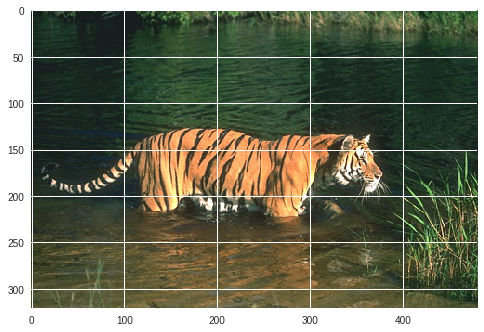

size:
321
481
Normalized Cut Test
Resized Image


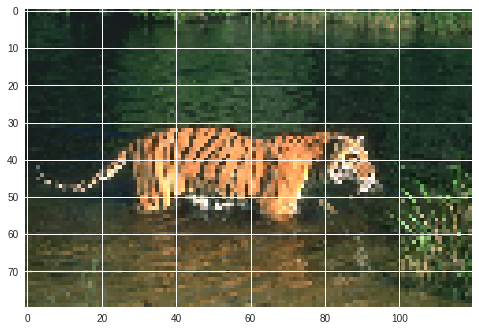

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Normalized cut resutls


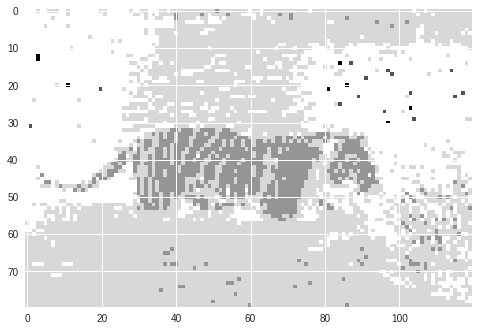

n-cut labels
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 1 0 0]
 [1 1 1 ... 1 1 1]]
(80, 120)
K means Test
rgb:  (79, 85, 49)
k:  5
Iterations:  70737
154401


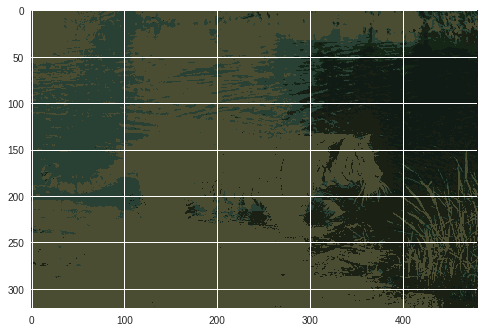

Conditional Entropy:  0.5172830453188827
F-Measure:  0.29289933092743503


'\nlabelss = [0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2]\n\ngTruth1 = [5,5,7,5,5,5,5,3,7,7,3,7,7,5,3,3,3,5]\n\ngTruth  = [0,0,1,0,0,0,0,2,1,1,2,1,1,0,2,2,2,0]\n#gTruth = [3,0,1,0,4,5,5,5,1,3,2,1,4,0,2,3,2,0]\n\nconditonalEntropy = calc_condEntropy(labelss,gTruth,3)\nfMeasure = calc_Fmeasure(labelss,gTruth,3)\n\n#print("gt k: ",gt_kcount(gTruth))\n'

In [71]:
########################################################## TEST Segmentation ##############################################################
import cv2

##### test on 1 jpg image
image = train_dict_image['10']
plt.imshow(image)
plt.show()
#print(image.shape)

imageW = image.size[0] 
imageH = image.size[1]

print("size:")
print(imageH)
print(imageW)


##### apply normalized cut algorithm
print("Normalized Cut Test")
k = 5

n_cut_labels = Normalized_Cut(image, n_clusters=k, n_neighbors=k)
#Normalized_Cut(np.array(dataVector_scaled),k)

print("n-cut labels")
print(n_cut_labels)
print(n_cut_labels.shape)



#### apply k means algorithm
print("K means Test")

#	Initialise data vector with attribute r,g,b for each pixel
dataVector = np.ndarray(shape=(imageW * imageH, 5), dtype=float)



###	Populate data vector with data from input image
#	Populate data vector with data from input image
#	dataVector has 5 fields: red, green, blue, x coord, y coord
for y in range(0, imageH):
      for x in range(0, imageW):
      	xy = (x, y)
      	rgb = image.getpixel(xy)
      	dataVector[x + y * imageW, 0] = rgb[0]
      	dataVector[x + y * imageW, 1] = rgb[1]
      	dataVector[x + y * imageW, 2] = rgb[2]
      	dataVector[x + y * imageW, 3] = x
      	dataVector[x + y * imageW, 4] = y

print("rgb: ",rgb)
#	Standarize the values of our features - size: (#pixels , 5)
dataVector_scaled = preprocessing.normalize(dataVector)
#print(dataVector_scaled.shape)


## apply K-means algorithm 
K = [3, 5, 7, 9]

k = 5
labels,centroids = K_Means(np.array(dataVector_scaled),k,0)

#kmeans = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300).fit(np.array(dataVector_scaled))
#labels  = kmeans.labels_
#centroids = kmeans.cluster_centers_

print(len(labels))


#	set the pixels on original image to be that of the pixel's cluster's centroid
for i in range(0,len(labels)):
   dataVector[i][0] = int(round(centroids[labels[i]][0]* 255))
   dataVector[i][1] = int(round(centroids[labels[i]][1]* 255))
   dataVector[i][2] = int(round(centroids[labels[i]][2]* 255))


# produce segmented image
img = Image.new("RGB", (imageW, imageH))

for y in range(0,imageH):
	for x in range(0,imageW):
	 	img.putpixel((x, y), (int(dataVector[y * imageW + x][0]), 
	 							int(dataVector[y * imageW + x][1]),
	 							int(dataVector[y * imageW + x][2])))
plt.imshow(img)
plt.show()



########################################################## TEST  Evaluation ##############################################################

#try on first ground truth on image at index 5
groundTruthMatrix = my_dict_for_groundtruth[5]['0']

groundTruthLabel = get_groundTruthLabel(groundTruthMatrix)


## resulted k mean label -> labels

conditonalEntropy = calc_condEntropy(labels,groundTruthLabel,5)

fMeasure = calc_Fmeasure(labels,groundTruthLabel,5)

'''
labelss = [0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2]

gTruth1 = [5,5,7,5,5,5,5,3,7,7,3,7,7,5,3,3,3,5]

gTruth  = [0,0,1,0,0,0,0,2,1,1,2,1,1,0,2,2,2,0]
#gTruth = [3,0,1,0,4,5,5,5,1,3,2,1,4,0,2,3,2,0]

conditonalEntropy = calc_condEntropy(labelss,gTruth,3)
fMeasure = calc_Fmeasure(labelss,gTruth,3)

#print("gt k: ",gt_kcount(gTruth))
'''

# **Apply K-means on k = [3,5,7,9,11] on Training set images - Comparing measures for each k  - Decide best to be run on Test - Showing measure results on Test set **

In [82]:
########################################################## Helper Functions ##############################################################
def do_Kmeans(image,k):
 
  #	Initialise data vector with attribute r,g,b for each pixel
  imageW = image.size[0] 
  imageH = image.size[1]
  dataVector = np.ndarray(shape=(imageW * imageH, 5), dtype=float)

  ###	Populate data vector with data from input image
  #	Populate data vector with data from input image
  #	dataVector has 5 fields: red, green, blue, x coord, y coord
  for y in range(0, imageH):
        for x in range(0, imageW):
          xy = (x, y)
          rgb = image.getpixel(xy)
          dataVector[x + y * imageW, 0] = rgb[0]
          dataVector[x + y * imageW, 1] = rgb[1]
          dataVector[x + y * imageW, 2] = rgb[2]
          dataVector[x + y * imageW, 3] = x
          dataVector[x + y * imageW, 4] = y

  
  #	Standarize the values of our features - size: (#pixels , 5)
  dataVector_scaled = preprocessing.normalize(dataVector)
  
  ## apply K-means algorithm 
  labels,centroids = K_Means(np.array(dataVector_scaled),k,0)
  
  return labels

def AVG_condEntropy(km_labels,gTruth_matrix,k):
  avg_condEntropy = 0
  for i in range(0,len(gTruth_matrix)):
    gt_m = gTruth_matrix[str(i)]
    gt_labels = get_groundTruthLabel(gt_m)
    conditonalEntropy = calc_condEntropy(km_labels,gt_labels,k)
    avg_condEntropy = avg_condEntropy +conditonalEntropy
  avg_condEntropy = avg_condEntropy / len(gTruth_matrix)
  return avg_condEntropy

def AVG_Fmeasure(km_labels,gTruth_matrix,k):
  avg_Fmeasure = 0
  for i in range(0,len(gTruth_matrix)):
    gt_m = gTruth_matrix[str(i)]
    gt_labels = get_groundTruthLabel(gt_m)
    fMeasure  = calc_condEntropy(km_labels,gt_labels,k)
    avg_Fmeasure = avg_Fmeasure + fMeasure
  avg_Fmeasure = avg_Fmeasure / len(gTruth_matrix)
  return avg_Fmeasure




########################################################## Test K-Means Comparasion ##############################################################

## different vals of k
k = [3,5,7,9,11]

## Arrays definitions
#rows = 200 #of training imgs
rows = 10 #of training imgs
cols = 5   # of vals of k

## 2 x 2-D array holding Entropy & F-measure
  # row -> image i in training set
  # col -> each value j of possible k
  # a[i][j] --> [entropy] or [fmeasure] 

kMeans_entropy_results = [[]]
kMeans_entropy_results = [[0 for i in range(cols)] for i in range(rows)]

kMeans_fMeasure_results = [[]]
kMeans_fMeasure_results = [[0 for i in range(cols)] for i in range(rows)]


## 2-D array holding results of K-means
  # row -> image i in training set
  # col -> each value j of possible k
  # a[i][j] --> entropy/fmeasure (minimum is better)

kMeans_Train_results = [[]]
kMeans_Train_results = [[0 for i in range(cols)] for i in range(rows)]

# i -> image
# j -> k val
for i in range(0,rows):
  for j in range (0,cols):
  
    image = train_dict_image[str(i)]

    kMeans_labels = do_Kmeans(image,k[j])
    
    avg_condEntropy = AVG_condEntropy(kMeans_labels,train_dict_groundtruth[i],k[j])
    avg_Fmeasure = AVG_Fmeasure(kMeans_labels,train_dict_groundtruth[i],k[j])
    
    kMeans_entropy_results[i][j]  = avg_condEntropy
    kMeans_fMeasure_results[i][j] = avg_Fmeasure
    kMeans_Train_results[i][j]    = avg_condEntropy / avg_Fmeasure
    
print("done!")



k:  3
Iterations:  116458
Conditional Entropy:  2.4802606396026254
Conditional Entropy:  1.5476697801783492
Conditional Entropy:  2.356641091345246
Conditional Entropy:  2.3728907924787546
Conditional Entropy:  2.7949125059601654
Conditional Entropy:  2.4865837982797365
Conditional Entropy:  2.4802606396026254
Conditional Entropy:  1.5476697801783492
Conditional Entropy:  2.356641091345246
Conditional Entropy:  2.3728907924787546
Conditional Entropy:  2.7949125059601654
Conditional Entropy:  2.4865837982797365
k:  5
Iterations:  96671
Conditional Entropy:  2.1689496997218445
Conditional Entropy:  1.361746765785563
Conditional Entropy:  2.065885535535483
Conditional Entropy:  2.086591642100706
Conditional Entropy:  2.455570362558728
Conditional Entropy:  2.1819923603867735
Conditional Entropy:  2.1689496997218445
Conditional Entropy:  1.361746765785563
Conditional Entropy:  2.065885535535483
Conditional Entropy:  2.086591642100706
Conditional Entropy:  2.455570362558728
Conditional Entr

In [86]:

## Showing Measure results 

print("Entropy Results")
entropy_total = [ sum(x) for x in zip(*kMeans_entropy_results) ]
for i in range (0,len(entropy_total)):
  print("k:",k[i], "Entropy: ",entropy_total[i]/rows)


print("F-measure Results")
fmeasure_total = [ sum(x) for x in zip(*kMeans_fMeasure_results) ]
for i in range (0,len(entropy_total)):
  print("k:",k[i], "F-measure: ",fmeasure_total[i]/(2*rows))


print("Best K values [min 'entropy/fmeaure' value] ")
ent_fmeas = [ sum(x) for x in zip(*kMeans_Train_results) ]
print ("K -> ",k[ent_fmeas.index(min(ent_fmeas))])



'''  
    
k = 5

##### test on 1 jpg image



##### apply normalized cut algorithm
k = 5

n_cut_labels = Normalized_Cut(image, n_clusters=k, n_neighbors=k)
#Normalized_Cut(np.array(dataVector_scaled),k)

print("n-cut labels")
print(n_cut_labels)
print(n_cut_labels.shape)


'''


Entropy Results
k: 3 Entropy:  1.6698504920408586
k: 5 Entropy:  1.5347772001319835
k: 7 Entropy:  1.4763900523264033
k: 9 Entropy:  1.421875547570343
k: 11 Entropy:  1.3887143232371886
F-measure Results
k: 3 F-measure:  0.8349252460204293
k: 5 F-measure:  0.7673886000659917
k: 7 F-measure:  0.7381950261632017
k: 9 F-measure:  0.7109377737851715
k: 11 F-measure:  0.6943571616185943
Best K values [min 'entropy/fmeaure' value] 
K ->  3


'  \n    \n\nk = 5\n\n##### test on 1 jpg image\n\n\n\n##### apply normalized cut algorithm\nk = 5\n\nn_cut_labels = Normalized_Cut(image, n_clusters=k, n_neighbors=k)\n#Normalized_Cut(np.array(dataVector_scaled),k)\n\nprint("n-cut labels")\nprint(n_cut_labels)\nprint(n_cut_labels.shape)\n\n\n'

# **Bonus - Spatial K-means (Implementation from Scratch)**

In [92]:
########################################################## Spacial K-means ##############################################################
def min_RGB(p,centroids):
    minInd = -1
    minDis = sys.maxsize
    for i in range (0,len(centroids)):
        dis = math.sqrt( (p[0]-centroids[i][0])**2 + (p[1]-centroids[i][1])**2 + (p[2]-centroids[i][2])**2 + (p[3]-centroids[i][3])**2 + (p[4]-centroids[i][4])**2 )
        if dis < minDis:
            minDis = dis
            minInd = i
    return minInd

#Kmeans algorithm
def spatial_Kmeans(dataSet,k,e):
    
    # number of iterations 
    t = 0
    #initialize k random UNIQUE centroids
    centroids = []
    chosenIndx = []*k
    for i in range(0,k):
        t = random.randint(0,len(dataSet)-1)
        while t in chosenIndx :
            t = random.randint(0,len(dataSet)-1)
        chosenIndx.append(t)
        x = dataSet[t][:]
        centroids.append(x)   
    
    while True:        
        t = t + 1
    
        #initialize label holding clustered dataset 
        labels = [None] * len(dataSet)
        #initialize clusters -each row contains data set of same cluster-
        clusters =[]
        for q in range(0,k):
            clusters.append([])
                    
        #clusters & labels assignment
        for i in range(0,len(dataSet)):
            j = min_RGB(dataSet[i],centroids)      
            clusters[j].append(dataSet[i])
            labels[i] = j
        
        #centroids update
        l = len(centroids)
        prevCentroids = []
        prevCentroids = copy.deepcopy(centroids)
        centroids = []
        for i in range (0,l):
            sumR = 0
            sumG = 0
            sumB = 0

            for j in range (0,len(clusters[i])):
                sumR = sumR + clusters[i][j][0]
                sumG = sumG + clusters[i][j][1]
                sumB = sumB + clusters[i][j][2]
                
            x = []
            x.append(sumR/len(clusters[i]))
            x.append(sumG/len(clusters[i]))
            x.append(sumB/len(clusters[i]))
            centroids.append(x)   
        
        #stopping condition - can be added here: max # of iterations 't's
        if np.all(prevCentroids) == np.all(centroids) :
            break
        
    print ("k: ",k)
    print("Iterations: ",t)
    return labels,centroids
  

def do_spatial_Kmeans(image,k):
 
  #	Initialise data vector with attribute r,g,b for each pixel
  imageW = image.size[0] 
  imageH = image.size[1]
  dataVector = np.ndarray(shape=(imageW * imageH, 5), dtype=float)

  ###	Populate data vector with data from input image
  #	Populate data vector with data from input image
  #	dataVector has 5 fields: red, green, blue, x coord, y coord
  for y in range(0, imageH):
        for x in range(0, imageW):
          xy = (x, y)
          rgb = image.getpixel(xy)
          dataVector[x + y * imageW, 0] = rgb[0]
          dataVector[x + y * imageW, 1] = rgb[1]
          dataVector[x + y * imageW, 2] = rgb[2]
          dataVector[x + y * imageW, 3] = x
          dataVector[x + y * imageW, 4] = y

  
  #	Standarize the values of our features - size: (#pixels , 5)
  dataVector_scaled = preprocessing.normalize(dataVector)
  
  ## apply K-means algorithm 
  labels,centroids = spatial_Kmeans(np.array(dataVector),k,0)
  
  return labels  
########################################################## TEST MAIN ##############################################################
print("Spatial K-Means Implementation function loaded Succesfully")

Spatial K-Means Implementation function loaded Succesfully


In [93]:
############################################## Spatial K-means VS K-means ##############################################
## different vals of k
k = [3,5,7,9,11]

## Arrays definitions
#rows = 200 #of training imgs
rows = 5 #of training imgs
cols = 5   # of vals of k

## 2 x 2-D array holding Entropy & F-measure
  # row -> image i in training set
  # col -> each value j of possible k
  # a[i][j] --> [entropy] or [fmeasure] 

kMeans_entropy_results = [[]]
kMeans_entropy_results = [[0 for i in range(cols)] for i in range(rows)]

spacial_kMeans_entropy_results = [[]]
spacial_kMeans_entropy_results = [[0 for i in range(cols)] for i in range(rows)]

kMeans_fMeasure_results = [[]]
kMeans_fMeasure_results = [[0 for i in range(cols)] for i in range(rows)]

spacial_kMeans_fMeasure_results = [[]]
spacial_kMeans_fMeasure_results = [[0 for i in range(cols)] for i in range(rows)]

# i -> image
# j -> k val
for i in range(0,rows):
  for j in range (0,cols):
  
    image = train_dict_image[str(i)]

    kMeans_labels         = do_Kmeans(image,k[j])
    spacial_kMeans_labels = do_spatial_Kmeans(image,k[j])
    
    avg_condEntropy = AVG_condEntropy(kMeans_labels,train_dict_groundtruth[i],k[j])
    avg_Fmeasure = AVG_Fmeasure(kMeans_labels,train_dict_groundtruth[i],k[j])
    
    kMeans_entropy_results[i][j]  = avg_condEntropy
    kMeans_fMeasure_results[i][j] = avg_Fmeasure
    
    avg_condEntropy = AVG_condEntropy(spacial_kMeans_labels,train_dict_groundtruth[i],k[j])
    avg_Fmeasure = AVG_Fmeasure(spacial_kMeans_labels,train_dict_groundtruth[i],k[j])
    
    spacial_kMeans_entropy_results[i][j]  = avg_condEntropy
    spacial_kMeans_fMeasure_results[i][j] = avg_Fmeasure

    
print("done!")

k:  3
Iterations:  105608
k:  3
Iterations:  4543
Conditional Entropy:  2.068007198767907
Conditional Entropy:  1.4151867144082426
Conditional Entropy:  1.921042988469923
Conditional Entropy:  1.9570731460541433
Conditional Entropy:  2.3841053717069456
Conditional Entropy:  2.0935337833991263
Conditional Entropy:  2.068007198767907
Conditional Entropy:  1.4151867144082426
Conditional Entropy:  1.921042988469923
Conditional Entropy:  1.9570731460541433
Conditional Entropy:  2.3841053717069456
Conditional Entropy:  2.0935337833991263
Conditional Entropy:  1.993592496312945
Conditional Entropy:  1.202104597779433
Conditional Entropy:  1.9647918498356074
Conditional Entropy:  2.0049546922202905
Conditional Entropy:  2.367286995999942
Conditional Entropy:  2.05502870316082
Conditional Entropy:  1.993592496312945
Conditional Entropy:  1.202104597779433
Conditional Entropy:  1.9647918498356074
Conditional Entropy:  2.0049546922202905
Conditional Entropy:  2.367286995999942
Conditional Entropy

In [94]:
## Showing Measure results 

print("Entropy Results")
entropy_total         = [ sum(x) for x in zip(*kMeans_entropy_results) ]
spatial_entropy_total = [ sum(x) for x in zip(*spacial_kMeans_entropy_results) ]

print("* Standard K-means *")
for i in range (0,len(entropy_total)):
  print("k:",k[i], "Entropy: ",entropy_total[i]/rows)

print("* Spatial K-means *")
for i in range (0,len(entropy_total)):
  print("k:",k[i], "Entropy: ",spatial_entropy_total[i]/rows)
  
  
print("F-measure Results")
fmeasure_total         = [ sum(x) for x in zip(*kMeans_fMeasure_results) ]
spatial_fmeasure_total = [ sum(x) for x in zip(*spacial_kMeans_fMeasure_results) ]

print("* Standard K-means *")
for i in range (0,len(entropy_total)):
  print("k:",k[i], "F-measure: ",fmeasure_total[i]/(2*rows))

print("* Spatial K-means *")
for i in range (0,len(entropy_total)):
  print("k:",k[i], "F-measure: ",spatial_fmeasure_total[i]/(2*rows))


  

Entropy Results
* Standard K-means *
k: 3 Entropy:  1.9148283464606712
k: 5 Entropy:  1.683395038418417
k: 7 Entropy:  1.5396021951774561
k: 9 Entropy:  1.5033250043440773
k: 11 Entropy:  1.3251069882372934
* Spatial K-means *
k: 3 Entropy:  1.8211354288391708
k: 5 Entropy:  1.6761856755361655
k: 7 Entropy:  1.5175131991682886
k: 9 Entropy:  1.269291468762939
k: 11 Entropy:  1.2549991267942109
F-measure Results
* Standard K-means *
k: 3 F-measure:  0.9574141732303356
k: 5 F-measure:  0.8416975192092085
k: 7 F-measure:  0.7698010975887281
k: 9 F-measure:  0.7516625021720387
k: 11 F-measure:  0.6625534941186467
* Spatial K-means *
k: 3 F-measure:  0.9105677144195854
k: 5 F-measure:  0.8380928377680827
k: 7 F-measure:  0.7587565995841443
k: 9 F-measure:  0.6346457343814695
k: 11 F-measure:  0.6274995633971054
